In [1]:
# 导入必要库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 加载数据
df = pd.read_csv("bi.csv", encoding="latin1")

# 1. 数据概览
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None
             Age  entryEXAM  studyHOURS     Python          DB
count  77.000000  77.000000   77.000000  75.000000   77.000000
mean   35.207792  76.753247  149.714286  75.853333   69.467532
std    10.341966  16.475784   12.743272  15.410328   17.033701
min   

In [3]:

# 2. 数据清洗
# 统一性别表示
df['gender'] = df['gender'].map({'M': 'Male', 'F': 'Female', 'Male': 'Male', 'Female': 'Female'})

# 统一教育背景
df['prevEducation'] = df['prevEducation'].replace({'High School': 'HighSchool', 'Highschool': 'HighSchool'})

# 填充缺失值（用中位数）
df['Python'].fillna(df['Python'].median(), inplace=True)


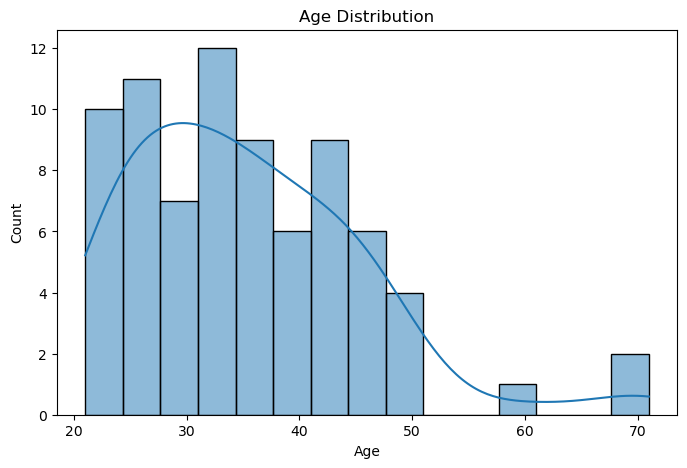

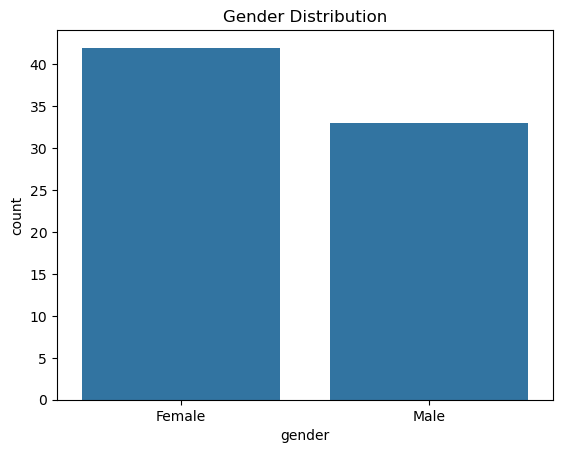

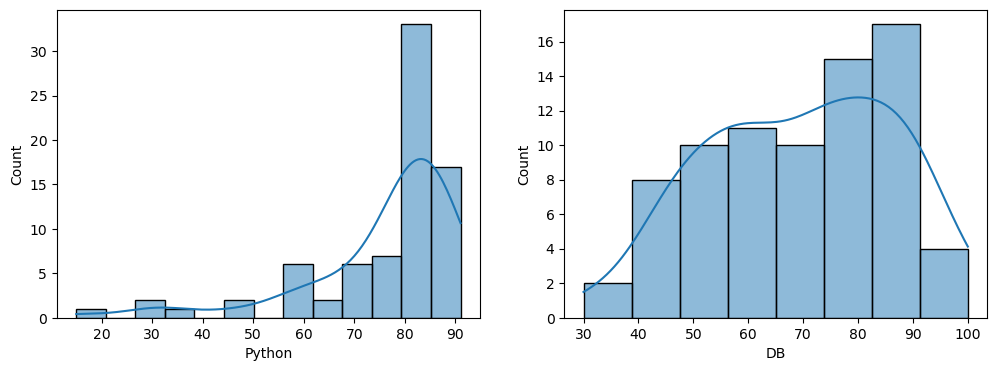

In [5]:

# 3. 可视化分析
# 年龄分布
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

# 性别分布
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

# 成绩分布
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Python'], kde=True, ax=axes[0])
sns.histplot(df['DB'], kde=True, ax=axes[1])
plt.show()


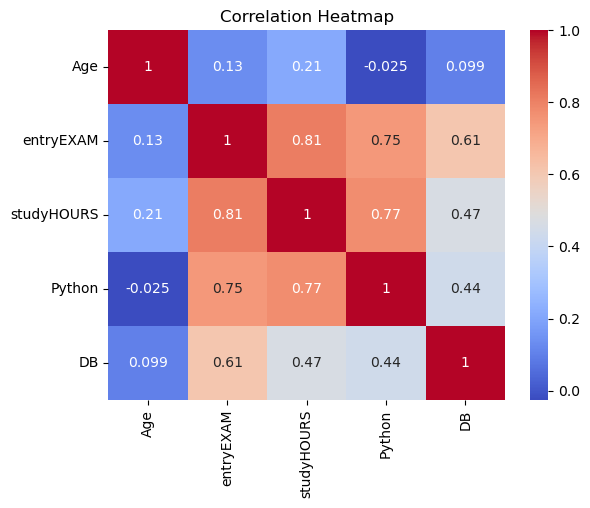

In [7]:

# 4. 相关性分析
corr = df[['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


MAE: 7.8793750000000005
R² Score: 0.5117949101897685


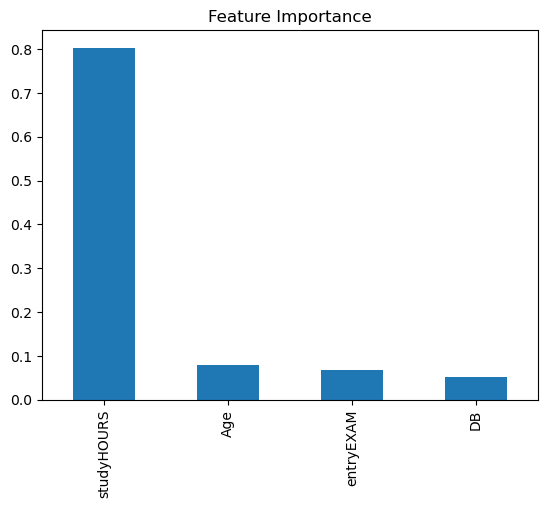

In [9]:

# 5. 机器学习：预测 Python 成绩
# 选择特征和目标
features = ['Age', 'entryEXAM', 'studyHOURS', 'DB']
X = df[features]
y = df['Python']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 特征重要性
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()